# Statistical tests in python

## What is a statistical test?

Statistical tests are used in hypothesis testing to:
- Determine the relationships beween input and output variables
- Estimate the differences between two or  more groups


## What is hypothesis testing
This is a way for researchers to make decisions about whether their ideas/hypotheses are supported by evidence from their experiemnets or observations. Here is a flow of hoe the hypothesis is used:

1. Formulate a hypothesis: start with an idea or gues about something you want to study
2. Collect data: conduct experiemnts or gather information to be used to support your hypothesis
3. Test your hypothesis: using statistical techniques, analyze the data and determine if it provides strong evidence for or against the hypothesis
4. Decide a signifcance level
5. Make a conclusion based on the analysis to decide whether the data supports your original idea or if it suggests otherwise.

## What is a Type I and Type II error

These are concepts related to hypothesis testing.

### Type I error (False positive) - Rejected when it was actually correct

It occurs when we reject a true null hypothesis, i.e., we incorrectly conclude that there is an effect or difference when there isn't one. It is denoted by $(\alpha)$, the significance level. For example:

- Scenario: checking the innocency of a supposed criminal
- $H_0:$ the person is innocent
- Type I error $(\alpha)$: concluding that the individual is guility when actually he is innocent.


### Type II error (False negative) - Accepted when it is actually incorrect

This occurs when we accept (i.e fail to reject) a false null hypothesis. In this case, there is a true effect/difference, but our test fails to detect it. It is denoted by $(\beta)$. Example:

- Scenario: checking the innocency of a supposed criminal
- $H_0:$ the person is innocent
- Type II error $(\beta):$ concluing that the person is innocent when he is actually guility.

#### Relationship between the errors
- Inverse relationships

There is an inverse relationship between Type I and Type II errors. As you decrease the likelihood of one type of error, the likelihood of the other type of error increases.

- Adjusting significance level

By decreasing the significance level, we decrease the probability of committing a type I error, but the probability of committing a type II error may increase.

## What p-value?

Short for probability value. It quantifies the strength of evidence, i.e how likely the evidence occured by random chance. **The smaller the p-value, the less likely the result occured by a random chance** and the stronger the evidence that you should reject the null hypothesis.

To determine whether the p-value is significan or not, we need a significance threshold aka significance level. This threshold is usually set to 0.05. Lower thresholds, e.g., 0.01, require stronger evidence.

- If p-value is below the threshold, then we can infer a statistically significant evidence, i.e, the outcome didn't occur randomly.

i.e. For p-value < 0.05, reject the null hypothesis

- Otherwise, we can infer that there is no statistically signifcant evidence, i.e outcome occured at random.

i.e., For p-value > 0.05, accept the null hypothesis (i.e., fail to reject the null hypothesis)

## Different hypothesis tests

### Univariate
- Chi-square goodness-of-fit test: tests whether the observed frequencies of categorical data match the expected frequencies according to a specified distribution

- Shapiro-wilk test: checks whether a dataset follows a normal distribution

- Kolmogorov-Smirnov test: tests whether a sample comes from a specific distribution (not limited to normal distribution). It can be used to compare any two continuous distributions

- One- sample t-test: tests whether the mean of a single sample is significantly different from a known or hypothesized population mean.

### Bivariate
- Pearson test: tests whether two sampes have a linear relationship
- Two sample t-test: comapres the means of two related samples (e.g., before and after treatment)  to determine if there is a significant difference.
- ANOVA(one_way_anova): compares the mean of three or more samples to determine if there is a significant difference between the samples.
- Chi-square test of independence: tests whether there is a significant association between two categorical variables in a contigency table

In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#renaming columns

df.columns = df.columns.str.strip().str.replace('-', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Univariate analysis - discrete data

In [5]:
discrete_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['int64'])

In [6]:
def discrete_uni_analysis(discrete_data):
    for col_name in discrete_data:
        print('*'*10, col_name, '*'*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value counts: \n', discrete_data[col_name].value_counts())
        print()

In [7]:
discrete_uni_analysis(discrete_df)

********** workclass **********
count                                                  48842
nunique                                                    9
unique     [Private, Local-gov, ?, Self-emp-not-inc, Fede...
Name: workclass, dtype: object
Value counts: 
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

********** education **********
count                                                  48842
nunique                                                   16
unique     [11th, HS-grad, Assoc-acdm, Some-college, 10th...
Name: education, dtype: object
Value counts: 
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           9

<AxesSubplot:xlabel='gender', ylabel='count'>

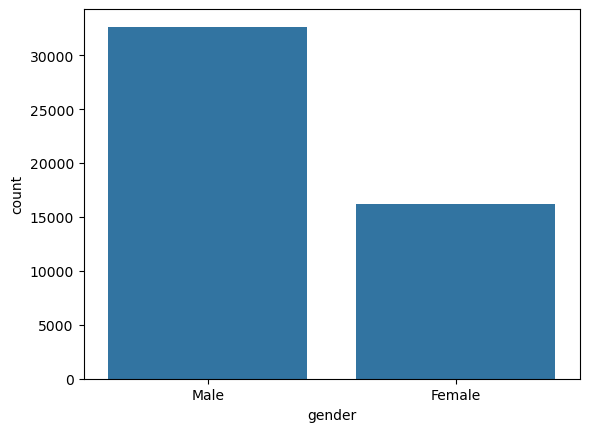

In [8]:
sns.countplot(data=df, x='gender')

### Chi-square test of goodness-of-fit

Here, we want to test if the observed frequencies of the categorical data match the expected frequencies according to a distribution we specify.

**Assumptions**
- Observations in each sample are independent and identically distributed
- Observations should be discrete

**Interpretation**
- $H_0:$ the observed and expected frequencies are matching
- $H_1:$ the observed and expected frequencies are not matching

In [9]:
def chi_square_good_fit(observed_freq, expected_freq, significance_level):
    stat, p_value = stats.chisquare(observed_freq, expected_freq)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_O because the observed and expected frequencies do not match')
    else:
        print('Accept the H_0 because the observed and expected frequencies match')


In [10]:
sample = df['gender'].sample(n=500)

observed_freq = sample.value_counts().tolist()
expected_freq = [300, 200]

chi_square_good_fit(observed_freq, expected_freq, significance_level=0.05)


stat=17.633, p_value=0.000
Reject H_O because the observed and expected frequencies do not match


## Univariate analysis - numerical data

In [11]:
def num_uni_analysis(numerical_data):
    for col_name in numerical_data:
        print('*'*10, col_name, '*'*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [12]:
num_uni_analysis(numerical_df)

********** age **********
min       17.000000
max       90.000000
mean      38.643585
median    37.000000
std       13.710510
Name: age, dtype: float64

********** fnlwgt **********
min       1.228500e+04
max       1.490400e+06
mean      1.896641e+05
median    1.781445e+05
std       1.056040e+05
Name: fnlwgt, dtype: float64

********** educational_num **********
min        1.000000
max       16.000000
mean      10.078089
median    10.000000
std        2.570973
Name: educational_num, dtype: float64

********** capital_gain **********
min           0.000000
max       99999.000000
mean       1079.067626
median        0.000000
std        7452.019058
Name: capital_gain, dtype: float64

********** capital_loss **********
min          0.000000
max       4356.000000
mean        87.502314
median       0.000000
std        403.004552
Name: capital_loss, dtype: float64

********** hours_per_week **********
min        1.000000
max       99.000000
mean      40.422382
median    40.000000
std       12

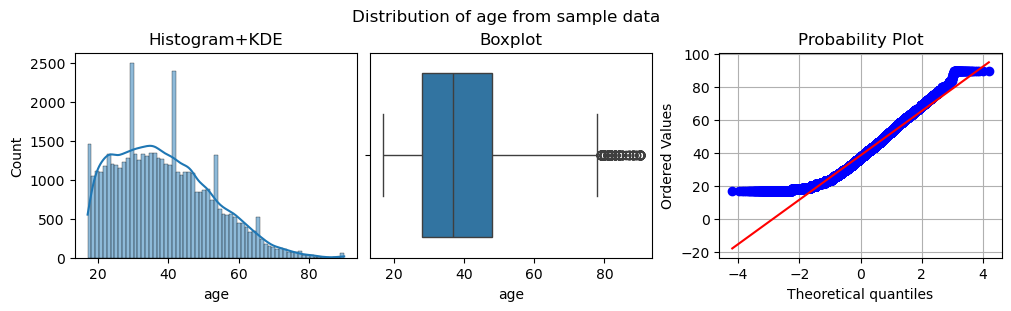

In [13]:
#visualizing

fig,axs = plt.subplots(1, 3, figsize=(10,3), constrained_layout=True)
fig.suptitle('Distribution of age from sample data')

axs[0].set_title('Histogram+KDE')
sns.histplot(data=df, x= 'age', kde=True, ax=axs[0])

axs[1].set_title('Boxplot')
sns.boxplot(data=df, x='age', ax=axs[1])

stats.probplot(df['age'], dist=stats.norm, plot=axs[2])
axs[2].grid()

Age is not normally distributed. We can also test for this using some other kind of statistical test.

### Shapiro Wilk test

This checks if a dataset follows a normal distribution. It tests the null hypothesis tyhat the data is normally distributed

**Assumptions**
- Observations in each sample are independent and identically distributed

**Interpretation**
- $H_0:$ the sample has a gaussian distribution
- $H_1:$ the sample does not have a gaussian distribution

**Drawback**

Cannot handle more than 5000 data points

In [14]:
def shapiro_wilk(data, significance_level):
    stat, p_value = stats.shapiro(data)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_O: probably not gaussian')
    else:
        print('Accept H_0: probably gaussian')

In [15]:
shapiro_wilk(df['age'], 0.05)

#using it on the entire population

stat=0.967, p_value=0.000
Reject H_O: probably not gaussian


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
shapiro_wilk(df['age'].sample(n=4500), 0.05)

stat=0.968, p_value=0.000
Reject H_O: probably not gaussian


### Kolmogorov-Smirnov (KS) test

The KS test is used to check if a sample follows a specific distribution

**Assumptions**
- Observations in each sample are independent and identically distributed

**Interpretation**
- $H_0:$ the sample has a (state distribution of interest) distribution
- $H_1:$ the sample does not have that distribution

In [17]:
def kolmogorov_smirnov(data, significance_level):
    stat, p = stats.kstest(data, 'norm')
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p < significance_level:
        print('Reject H_0: probably not gaussian')
    else:
        print('Accept the H_O: probably gaussian')

In [18]:
kolmogorov_smirnov(df['age'], 0.05)

stat=1.000, p=0.000
Reject H_0: probably not gaussian


### One-sample t-test

Tests if the mean of a single sample is signifucantly different from a known or hypothesized population mean.

**Assumptions**
- Observations in each sample are independent and identically distributed
- Observations are continuous measurements
- Data is normally distributed

**Interpretation**
- $H_0: \mu_{pop} = m_o$
- $H_1:\mu_{pop} \ne m_o$

In [19]:
def one_sample_t_test(sample, assumed_pop_mean, signficance_level):
    stat, p_value = stats.ttest_1samp(sample, assumed_pop_mean)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < signficance_level:
        print('Reject H_O: the sample is not equal to the population mean')
    else:
        print('Accept H_O: the sample is equal to the population mean')

In [20]:
sample = df['age'].sample(n=500)

assumed_pop_mean = 50

one_sample_t_test(sample, assumed_pop_mean, signficance_level=0.05)

stat=-19.193, p_value=0.000
Reject H_O: the sample is not equal to the population mean


## Bivariate analysis - numerical vs. numerical

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='capital_loss'>

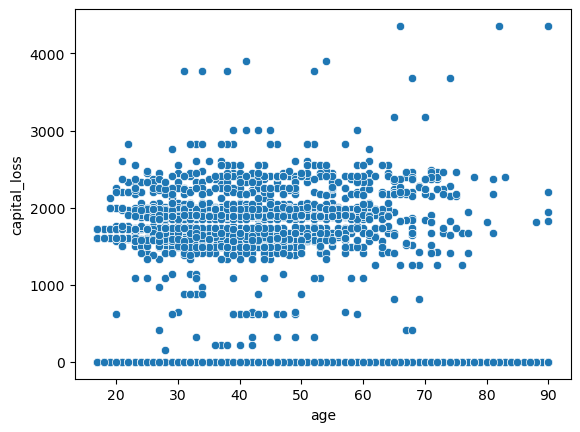

In [22]:
sns.scatterplot(data=df, x='age', y='capital_loss')

### Pearson's correlation coefficient

Tests whether two samples have a linear relationship

**Assumptions**
- Observations in each sample are independent and identically distributed
- Observations in each sample are normally distributed
- Observations in each sample have the same variance

**Interpretation**
- $H_0:$ the two samples are independent
- $H_1:$ there is a dependency between the samples

In [23]:
def pearson_test(data1, data2, significance_level):
    stat, p_value = stats.pearsonr(data1, data2)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_0: probably linear relationship exists')
    else:
        print('Accept the H_0: probably no linear relationship exists')
        

In [24]:
pearson_test(df['age'], df['capital_loss'], significance_level=0.05)

stat=0.057, p=0.000
Reject H_0: probably linear relationship exists


## Bivariate analysis - categorical vs. categorical

Text(0.5, 1.0, 'Incomce vs. workclass')

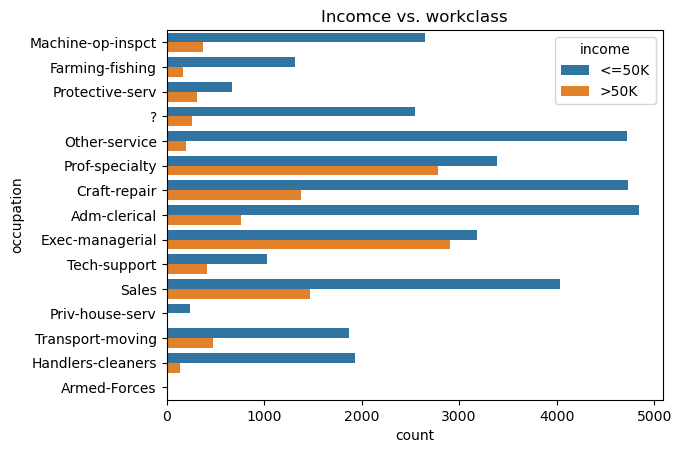

In [25]:
sns.countplot(data=df, y='occupation', hue = 'income')
plt.title('Incomce vs. workclass')

### Chi-squared test for independence

Tests whether two categorical variables are related or independent.

**Assumptions**
- Observations used in the calculations of the contigency table are independent
- 25 or more examples in each cell of the contigency table

**Interpretation**
- $H_0:$ the two samples are independent
- $H_1:$ there is a dependency between the samples

In [30]:
def chi_square(freq_table, significance_level):
    stat, p_value, dof, expected = stats.chi2_contingency(freq_table)
    
    print('stat=%3.f, p=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_0: probably dependent')
    else:
        print('Acept the H_0: probably independent')

In [31]:
freq_table = pd.crosstab(df['occupation'], df['income'])
freq_table

income,<=50K,>50K
occupation,,
?,2544,265
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204


In [32]:
chi_square(freq_table, significance_level=0.05)

stat=5983, p=0.000
Reject H_0: probably dependent


## Bivariate Analysis - numerical vs. categorical

<AxesSubplot:xlabel='gender', ylabel='age'>

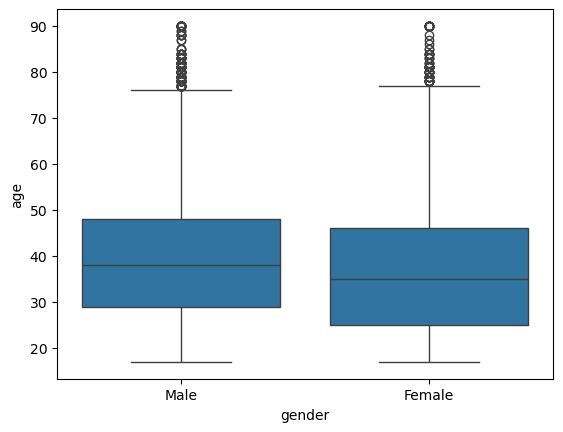

In [33]:
sns.boxplot(data=df, x='gender', y='age')

### Two sample t-test

A two sample t-test is applied when we want to compare the means of two independent groups to determine if they are significantly different from each other. It is used to test if the observed differences in means between the groups are likely to occur due to random chance or if they are statistically significant.

**Assumptions**
- Observations in each sample are independent and identically distributed
- Observations in each sample are normally distributed
- Observations in each sample have the same variance

**Interpretation**
- $H_0:$ the means of the samples are equal
- $H_1:$ the means of the samples are unequal

**Note**

When applying a two-sample t-test, it's important to ensure that the assumptions of normality and equal variance are met. If these assumptions are violated, alternative tests like the Mann-Whitney U test or Welch's test (for unequal variances) may be more appropriate.

In [44]:
def two_sample_ttest(data1, data2, significance_level):
    stat, p_value = stats.ttest_ind(data1, data2)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_0: there is a significant difference between the groups.')
    else:
        print('Accept H_0: there is no significant difference')

In [45]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [46]:
#let's compare the mean age for both the male and females to see if there is a significant difference

male_age = df[df['gender']=='Male']['age'].sample(n=100)
female_age = df[df['gender']=='Female']['age'].sample(n=100)

two_sample_ttest(male_age, female_age, significance_level=0.05)


stat=1.486, p_value=0.139
Accept H_0: there is no significant difference


#### Marital status vs Age

In [47]:
df['marital_status'].value_counts()

marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

<AxesSubplot:xlabel='age', ylabel='marital_status'>

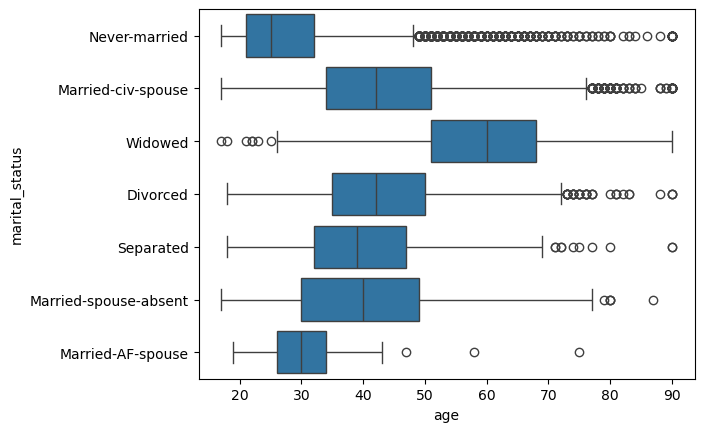

In [48]:
sns.boxplot(y=df['marital_status'], x=df['age'])

### Analysis of Variance test (ANOVA)

This is a statistical technique used to compare means between two or more groups. It is used to determine whether there are significant differences among the group means. It is particularly useful when you have more than two groups and you want to test if there are any differences in means across all groups

Both the two sample t-test and ANOVA are tests used to comapre means of different groups. Use 2 sample t-test when you have exactly two groups to compare. Use ANOVA when you have more than two groups and want to determine if there is a significant difference in means aming any of the groups.

**Types of ANOVA**
1. One-way ANOVA: compares means across three or more groups when you have one independent variable

2. Two-way ANOVA: examines the effects of 2 independent variables on a dependent variable. It allows you to assess oth main effects and interaction effects


**Assumptions**
- Observations in each sample are independent and identically distributed
- Observations in each sample are normally distributed
- Observations in each sample have the same variance

**Interpretation**
- $H_0:$ the means of the samples are equal
- $H_1:$ one or more of the means of the samples are unequal

**Note**

ANOVA provides information about the group differences, but it doesn't tell you which specific groups are different. Also ensure that your data meets the assumptions of ANOVA (normality, homogeneity of variance) for accurate interpretation


In [49]:
def one_way_anova(all_groups, significance_level):
    stat, p_val = stats.f_oneway(*all_groups)
    
    print('stat=%.3f, p_val=%.3f' % (stat, p_val))
    
    if p_val < significance_level:
        print('Reject H_0: there is a significant difference between groups')
    else:
        print('Accept H_0: there is no significant difference')

In [50]:
divorced_age = df[df['marital_status']=='Divorced']['age'].sample(n=300)
never_married_age = df[df['marital_status']=='Never-married']['age'].sample(n=300)
widowed_age = df[df['marital_status']=='Widowed']['age'].sample(n=300)

all_groups = [divorced_age, never_married_age, widowed_age]
one_way_anova(all_groups, significance_level=0.05)

stat=721.035, p_val=0.000
Reject H_0: there is a significant difference between groups


## Non-parametric statistics

They do not make assumptions about the underlying distribution of the data. They are used when the data may not meet the assumptions of the parametric tests. Examples include:

- Spearman's rank correlation (alternative for pearson test)
- Mann-Whitney U test(Wilcoxon Rank-Sum test) - alternative for 2-sample t-test
- Kruskal-Wallis test - alternative for one way ANOVA test

The Mann-Whitney U test and the Kruskal-Wallis test are used to assess whether there are differences between independent groups. They are applicable when the assumptions of parametric tests are not met such as when the data is not normally distributed.


### Spearman's rank correlation

Tests whether two samples have a monotonic relationship

**Assumptions**
- Observations in each sample are independent and identically distributed
- Observations in each sample can be ranked

**Interpretation**
- $H_0:$ the two samples are independent
- $H_1:$ there is a dependency between the samples


### Mann-Whitney U test

It is used to determine whether there is a difference in distribution between two independent groups. It is suitable for ordinal and continuous data.

- $H_0:$ there is no difference between the distributions of the two groups


### Kruskal-Wallis test

An extension of Mann-Whitney U test. It is used when there are more than two independent groups. It assesses whether there are any statistically significant differences between the medians of the groups.

- $H_0:$ there is no difference in distribution among the groups.


These tests are robust to deviations from normality and are often used when analysing data with unknown or non-normal distributions. Remember to check the assumptions and requirements of each test before applying them to your data.

In [51]:
#spearman implementation
def spearman(data1, data2, significance_level):
    stat, p_value = stats.spearmanr(data1, data2)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_0: probably a monotonic relationship exists')
    else:
        print('Accept H_0: probably a monotonic relationship does not exist')

In [55]:
spearman(df['age'], df['capital_loss'], significance_level=0.05)

stat=0.058, p_value=0.000
Reject H_0: probably a monotonic relationship exists


In [60]:
#mann whithney u test implementation
def mann_whitney_u(data1, data2, significance_level):
    stat, p_value = stats.mannwhitneyu(data1, data2)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_0: there is a difference in the distributions')
    else:
        print('Accept H_0: there is no difference in distribution among the groups.')

In [62]:
male_age = df[df['gender']=='Male']['age'].sample(n=500)
female_age = df[df['gender']=='Female']['age'].sample(n=500)

mann_whitney_u(male_age, female_age, significance_level=0.05)

stat=141236.000, p_value=0.000
Reject H_0: there is a difference in the distributions


In [58]:
#kruskal test implementation
def kruskal(all_groups, significance_level):
    stat, p_value = stats.kruskal(*all_groups)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject H_0: there is a significant difference between the groups')
    else:
        print('Accept H_0: there is no significant difference')
        

In [59]:
kruskal(all_groups, significance_level=0.05)

stat=563.053, p_value=0.000
Reject H_0: there is a significant difference between the groups


## Conclusion

| Application | Statistical Test | Type | Purpose | 
|:---|:---|:---|:---|
| **UNIVARIATE** - Discrete Data | Chi-Square Test for Goodness-of-Fit | `Parametric` | Tests whether the observed frequencies of categorical data match the expected frequencies according to a specified distribution. | 
| Univariate - Continuous Data | Kolmogorov-Smirnov Test | `Parametric` | Tests whether a sample comes from a specific distribution (not limited to normal distribution). It can be used to compare any two continuous distributions. | 
| Univariate - Continuous Data | One-Sample t-test | `Parametric` | Tests whether the mean of a single sample is significantly different from a known or hypothesized population mean. | 
| **BIVARIATE** - Continuous vs Continuous Data | Pearson Test | `Parametric` | Tests whether two samples have a linear relationship. | 
| Bivariate - Categorical vs Categorical Data | Chi-Square Test of Independence | `Parametric` | Tests whether there is a significant association between two categorical variables in a contingency table. |
| Bivariate - Categorical vs Numerical Data | Two-Sample t-test | `Parametric` | Compares the means of two related samples (e.g., before and after treatment) to determine if there is a significant difference. |
| Bivariate - Categorical vs Numerical Data | One-Way ANOVA | `Parametric` | Compares the mean of three or more samples. It helps determine if there is a significant difference between the samples. |
|                                           |               |                  |                    |
| Bivariate - Continuous vs Continuous Data | Spearman Test | `Non-Parametric` | Tests whether two samples have a monotonic relationship. | 
| Bivariate - Categorical vs Numerical Data | Mann-Whitney U Test | `Non-Parametric` | Compares the means of two related samples (e.g., before and after treatment) to determine if there is a significant difference. |
| Bivariate - Categorical vs Numerical Data | Kruskal-Wallis Test | `Non-Parametric` | Compares the mean of three or more samples. It helps determine if there is a significant difference between the samples. |